> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset ((TMDb movie data))

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

TMDb movie data has been selected in order to be Analyzed. It contains information around 10K movies collected from The Movie Database (TMDb), including user ratings and revenue.

This dataset consist of 21 colum as following:
(id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords,	overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj)

Therefore, after looking to the data, I decided to find the follwing questions:

1. what is the lowest and highest budget
2. what is the lowest and highest revenue
3. which movie has the highest profit and  which movie has the least profit
4. What is the avrage runtime
5. Finding the TMDB popularity over the years

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [149]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

# import all necessary packages and functions.
import csv
from datetime import datetime 
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties
First, I will start by loading part of the csv data to display the some of the contents

In [107]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
tmdb = pd.read_csv('tmdb.csv')
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
Then, I will check tthe data type and the number of null vlaues 

In [108]:
# Showing the data types
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<a id='wrangling'></a>
As we can see that some of the columns have too many missing or null values such as homepage, tagline, keywords, and production_companies. Which means these columns are not necessary to be filld. Therefore, they will be part of the columns that will be deleted. 

<a id='wrangling'></a>
Also, we need to see some descriptive statistics as following:

In [109]:
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='wrangling'></a>
As a result, we can see that budget, revenue, and runtime have Zeros. Therefore, I will conider them as missing data but I need to double check the quantity of these zeros by:

In [110]:
# Counting the Zeros 
budget = tmdb.groupby('budget').count()['id']
budget.head()

budget
0    5696
1       4
2       1
3       3
5       1
Name: id, dtype: int64

In [111]:
# Counting the Zeros 
revenue = tmdb.groupby('revenue').count()['id']
revenue.head()

revenue
0    6016
2       2
3       3
5       2
6       2
Name: id, dtype: int64

In [112]:
# Counting the Zeros 
runtime = tmdb.groupby('runtime').count()['id']
runtime.head()

runtime
0    31
2     5
3    11
4    17
5    17
Name: id, dtype: int64

<a id='wrangling'></a>
We can say from the above results that budget and revenue have too large number of zeros whereas runtime has only small number. As a result I think it will effect my analysis if I keep them. So, it is better to remove them. 

<a id='wrangling'></a>
Last thing I will check the number of unique values for scome columns in order to see how to deal with doplicate values 

In [113]:
#checking the number of unique values in each columns
tmdb.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [114]:
tmdb[tmdb.duplicated(['id']) == True].head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [115]:
tmdb[tmdb.duplicated(['original_title']) == True].head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1133,281778,tt3297792,0.188264,0,0,Survivor,Danielle Chuchran|Kevin Sorbo|Rocky Myers|Ruby...,http://www.arrowstormentertainment.com/#!survi...,John Lyde,Alone. Stranded. Deadly,...,During their search for a habitable planet the...,93,Science Fiction|Action|Fantasy,Arrowstorm Entertainment,7/22/14,23,4.9,2014,0.000000e+00,0.000000e+00
1194,296626,tt3534842,0.132764,0,0,Finders Keepers,Jaime Pressly|Kylie Rogers|Tobin Bell|Patrick ...,NaN,Alexander Yellen,NaN,...,A haunted doll teaches one little girl why chi...,85,Mystery|Thriller|Horror,HFD Productions|Hybrid LLC,10/18/14,33,4.8,2014,0.000000e+00,0.000000e+00
1349,42222,tt0076245,0.398651,0,0,Julia,Jane Fonda|Vanessa Redgrave|Jason Robards|Maxi...,NaN,Fred Zinnemann,"Through It All, Friendship Prevailed.",...,JULIA covers the 1930s when Lillian attained f...,117,Drama,Twentieth Century Fox Film Corporation,10/2/77,10,5.0,1977,0.000000e+00,0.000000e+00
1440,7445,tt0765010,1.223786,26000000,43318349,Brothers,Tobey Maguire|Jake Gyllenhaal|Natalie Portman|...,NaN,Jim Sheridan,There are two sides to every family.,...,When his helicopter goes down during his fourt...,104,Drama|Thriller|War,Lionsgate|Relativity Media|Sighvatsson Films|M...,1/27/09,381,6.7,2009,2.642641e+07,4.402879e+07
1513,62320,tt1014762,0.688361,0,0,Home,Glenn Close|Yann Arthus-Bertrand|Jacques Gambl...,http://www.homethemovie.org/,Yann Arthus-Bertrand,A Stunning Visual Portrayal of Earth,...,"With aerial footage from 54 countries, Home is...",95,Documentary,Europa Corp.|ElzÃ©vir Films|France 2 (FR2),6/3/09,109,7.8,2009,0.000000e+00,0.000000e+00


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

As we saw above, this data has 21 columns. Actually, we won't need all of them to answer the three questions listed above. 

Therefore, we will clean our data by:
1. Remving unnecessary colums
2. Removing Null values
3. Removing duplication
4. Replacing zero values with Null then deleting them 

1. Remving unnecessary colums including 'homepage','tagline','keywords','overview', 'budget_adj', 'revenue_adj']

In [116]:
# Remving unnecessary colums and rows
tmdb_drop = ['homepage','tagline','keywords','overview', 'budget_adj', 'revenue_adj']

tmdb.drop(tmdb_drop, axis=1, inplace=True)


In [117]:
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


2. Removing Null values

In [118]:
# Removing all Null values
null_col = ['popularity','original_title', 'cast', 'director', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year']
tmdb.dropna(subset = null_col, how='any', inplace=True)

3. Removing duplication

In [119]:
tmdb.drop_duplicates(keep ='first', inplace=True)
rows, col = tmdb.shape

print('The total entries of movies is {} and the columns of it is {}.'.format(rows-1, col))

The total entries of movies is 9771 and the columns of it is 15.


4. Removing zero values by replacing them to NAN values then deleting them

In [120]:
# Replacing all the Zeros to Null vaule 
zero_col=['budget', 'revenue', 'runtime']
tmdb[zero_col] = tmdb[zero_col].replace(0, np.NAN)

#Removing all the row which has NaN values
tmdb.dropna(subset = zero_col, inplace = True)

# check the number of entries after removing the NAN values 
rows, col = tmdb.shape
print('we have {} entries.'.format(rows-1))

we have 3804 entries.


<a id='eda'></a>
## Exploratory Data Analysis


> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



Fist, I defined a general function to find the highest and lowest data for the budget, revenue, and profit.

In [121]:
# Defining a function to calculate the highest and lowest

def highest_lowest(col_name):
    
    # Finding the highest 
    highest = tmdb[col_name].idxmax()
    high = pd.DataFrame(tmdb.loc[highest])
    
    # Finding the lowest
    lowest = tmdb[col_name].idxmin()
    lowe = pd.DataFrame(tmdb.loc[lowest])
    
    # Concatnting the dataframes  
    high_low = pd.concat([high, lowe], axis = 1)
    
    return high_low

### Research Question 1 :what is the lowest and highest budget

In [122]:
# Finding the highest and lowest budget
highest_lowest('budget')

,2244,2618
id,46528,39964
imdb_id,tt1032751,tt0120836
popularity,0.25054,0.090186
budget,4.25e+08,1
revenue,1.10876e+07,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance


As we can see that the highest budget with The Warrior's Way movie whereas the lowest is Lost & Found movie. 

### Research Question 2 :what is lowest and highest revenue

In [125]:
# Finding the highest and lowest revenue
highest_lowest('revenue')

,1386,5067
id,19995,13537
imdb_id,tt0499549,tt0323944
profit,2.54451e+09,-6e+06
popularity,9.43277,0.462609
budget,2.37e+08,6e+06
revenue,2.78151e+09,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94


As we can see that the highest revenue with Avatar movie whereas the lowest is Shattered Glass. 

### Research Question 3 :which movie has the highest profit and which movie has the least profit

In [123]:
# Calculating the profit of the each movie
tmdb.insert(2,'profit',tmdb['revenue']-tmdb['budget'])

In [124]:
highest_lowest('profit')

,1386,2244
id,19995,46528
imdb_id,tt0499549,tt1032751
profit,2.54451e+09,-4.13912e+08
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100


As we can see that the highest profit is 2.54451e+09 with Avatar whereas the lowest is -4.13912e+08 with The Warrior's Way. 

### Research Question 4 : What is the average runtime?

In [129]:
# Finding the average runtime
def avg_runtime(average):
    return tmdb[average].mean()

avg_runtime('runtime')

109.35111695137977

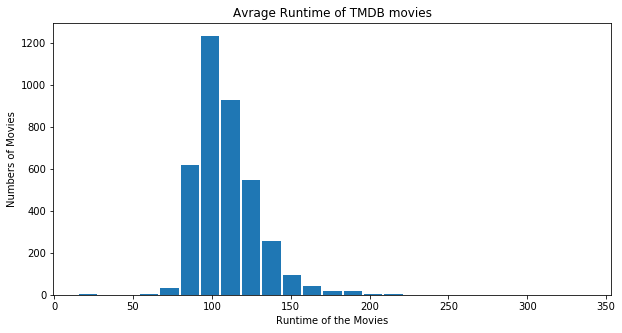

In [145]:
# Creating chart for the avrage runtime 

plt.figure(figsize=(10,5))
plt.title('Avrage Runtime of TMDB movies')
plt.xlabel('Runtime of the Movies')
plt.ylabel('Numbers of Movies')
plt.hist(tmdb['runtime'], rwidth = 0.9, bins =25)
plt.show()

From the graph we can say that the graph is right skewed. More than 1200 movies have 80 to 100 minutes runtime. 

### Research Question 5 : Finding the popularity over the years

In [147]:
# Finding the mean and median for popularity
mean = tmdb.groupby('release_year').mean()['popularity']
median = tmdb.groupby('release_year').median()['popularity']

# Indexing the mean and median
mean_index = mean.index
median_index = median.index

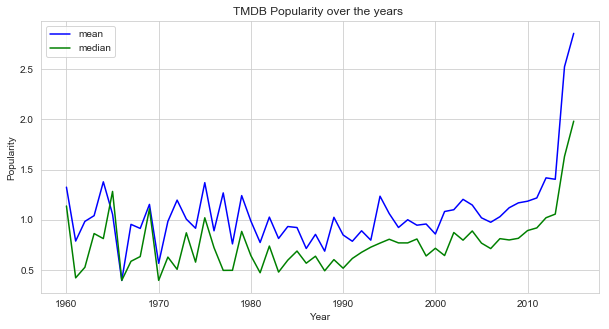

In [155]:
# Creating whitegrid for the popularity 

#set style
sns.set_style('whitegrid')

#set x, y axis data
x1, y1, x2, y2 = mean_index, mean, median_index, median

plt.figure(figsize=(10,5))
plt.plot(x1, y1, color = 'b', label = 'mean')
plt.plot(x2, y2, color = 'g', label = 'median')
plt.title('TMDB Popularity over the years ')
plt.xlabel('Year')
plt.ylabel('Popularity');
plt.legend(loc='upper left')

As I can see both mean and median are closed on their fluctuation. The highest peak for both of them is after 2012.  

<a id='conclusions'></a>
## Conclusions

This project studied TMDb movie data which collected from The Movie Database (TMDb). The original data set contains information around 10K movies with 21 colums. 

I cleaned the data by:
1. Remving unnecessary colums
2. Removing Null values
3. Removing duplication
4. Replacing zero values with Null then deleting them

After that I started answering the follwing questions:
1. what is the lowest and highest budget
The Warrior's Way movie got the highest budget whereas Lost & Found movie got the lowest budget.

2. what is the lowest and highest revenue
Avatar movie got the highest revenue whereas Shattered Glass movie got the lowest revenue

3. which movie has the highest profit and which movie has the least profit
Again Avatar movie got the hiest profit whereas The Warrior's Way movie got the lowest. 

4. What is the avrage runtime
More than 1200 movies have 80 to 100 minutes runtime.

5. Finding the TMDB popularity over the years
The highest peak for both of them is after 2012.


> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!